<h1 align='center'><b><font color='indianred'></p>Spam Detection</b></h1>




# <font color='indianred'> **Load the dataset**

- For this project you will use spam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [ ]:
# Import the pathlib library for working with file paths in a way that is cross-platform
from pathlib import Path

import pandas as pd

# Import the joblib library for saving and loading models
import joblib
from sklearn.model_selection import train_test_split
# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from spellchecker import SpellChecker


In [ ]:
#reading data
spamdf= pd.read_csv("/Users/anuraggupta/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/UTD/Academics/Fall'23/NLP/Assignment/Assignment-2/spam.csv", encoding='ISO-8859-1')

#labelling columns and dropping unwanted columns
spamdf["label"]= spamdf["v1"]
spamdf["message"]= spamdf["v2"]
spamdf= spamdf.drop(["v1", "v2", "Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

# Replacing ham with 0 and spam with 1
spamdf.label.replace({'spam': 1, 'ham': 0}, inplace = True)

#find the %ham and spam in data
print(spamdf.label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

0    86.6%
1    13.4%
Name: label, dtype: object


In [ ]:
#splitting data in train and test
X_train, X_test, y_train, y_test = train_test_split(spamdf.message, spamdf.label, test_size=0.25, random_state=42)

After Splitting into test and train, we will take the train subset from X_train to train the model

In [ ]:
spamdf_sample = pd.concat([X_train, y_train], axis = 1)
spamdf_sample = spamdf_sample.sample(frac = 0.2, ignore_index = True)
X_train_sample = spamdf_sample.message
y_train_sample = spamdf_sample.label
print(X_train_sample.shape, y_train_sample.shape)

(836,) (836,)


# <font color='indianred'> **Suitable metric for evaluating model**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

####  Given the significance of correctly identifying spam messages (class 1), my primary focus is on maximizing the recall score. This means I want to ensure that as many spam messages as possible are correctly identified, even if it means accepting some false positives. However, I also understand the importance of achieving a balance between precision and recall, which is why I'm considering the F1 score.

#### To address the challenge posed by the imbalanced dataset, I'm employing a technique known as cost-sensitive learning. This approach allows me to assign different misclassification costs to the classes, giving more weight to the minority class (spam) to ensure it's not overlooked.

#### In the logistic regression model, I'm using hyperparameters that include assigning class weights. These class weights are determined through a thorough search process using GridSearchCV with the best parameters. This approach allows me to fine-tune the model and optimize its performance, especially in handling the imbalanced nature of the dataset.

#### In summary, my strategy is to prioritize spam detection by maximizing recall while considering the F1 score for a balanced evaluation. To mitigate the challenges of an imbalanced dataset, I'm employing cost-sensitive learning and leveraging the power of hyperparameter tuning to achieve the best possible results.

# <font color='indianred'> **Classification Pipelines**</font>

* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





In [ ]:
#importing python modules
!cp "/Users/anuraggupta/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/UTD/Academics/Fall'23/NLP/Python Scripts/custom_preprocessor_mod.py" .
!cp "/Users/anuraggupta/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/UTD/Academics/Fall'23/NLP/Python Scripts/featurizer.py" .
!cp "/Users/anuraggupta/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/UTD/Academics/Fall'23/NLP/Python Scripts/plot_learning_curve.py" .

import custom_preprocessor_mod as cp
from featurizer import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [ ]:
X_train_sample= X_train_sample.to_numpy()
X_test= X_test.to_numpy()
X_train= X_train.to_numpy()

X_train_sample_cleaned = cp.SpacyPreprocessor(
    model='en_core_web_sm').transform(X_train_sample)

X_test_cleaned = cp.SpacyPreprocessor(
    model='en_core_web_sm').transform(X_test)

X_train_cleaned = cp.SpacyPreprocessor(
    model='en_core_web_sm').transform(X_train)

/Users/anuraggupta/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### **Pipeline 1**

---



---

In [ ]:
##Create Pipeline
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(solver='newton-cg',max_iter=10000)),])

To handle the imbalance dataset, Class sensitivity is being used

In [ ]:
# Setting the range for class weights
weights = np.linspace(0.0, 0.99, 200)

# Parameter Grid
param_grid_classifier_1 = {
    'vectorizer__max_features': [1000, 2000, 5000],
    'classifier__C': [1, 10, 50, 100],
    'classifier__class_weight': [{0: x, 1: 1.0 - x} for x in weights],
}

# GridSearch
grid_classifier_1 = GridSearchCV(
    estimator=classifier_1,
    param_grid=param_grid_classifier_1,
    n_jobs=-1,
    scoring='roc_auc').fit(X_train_sample_cleaned, y_train_sample)

In [ ]:
# let's check the train scores
print(grid_classifier_1.score(
    X_train_sample_cleaned, y_train_sample))

# let's check the cross validation score
print(grid_classifier_1.best_score_)


0.9999185288640595
0.974435865060865


In [ ]:
print(f'Best cross-validation score: {grid_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1.best_params_)
print("\nBest estimator: ", grid_classifier_1.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__C': 100, 'classifier__class_weight': {0: 0.9701005025125629, 1: 0.029899497487437143}, 'vectorizer__max_features': 5000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=100,
                                    class_weight={0: 0.9701005025125629,
                                                  1: 0.029899497487437143},
                                    max_iter=10000, solver='newton-cg'))])


In [ ]:
##Create Pipeline with class weights
classifier_1_new = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(C= 100,solver='newton-cg',max_iter=10000, class_weight={0: 0.019899497487437186,
                                                  1: 0.9801005025125629}))])

In [ ]:
#fitting on the training data
classifier1_fit= classifier_1_new.fit(X_train_cleaned, y_train)
#predicting test set
classifier1_pred= classifier1_fit.predict(X_test)



              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1202
           1       0.84      0.87      0.85       191

    accuracy                           0.96      1393
   macro avg       0.91      0.92      0.91      1393
weighted avg       0.96      0.96      0.96      1393



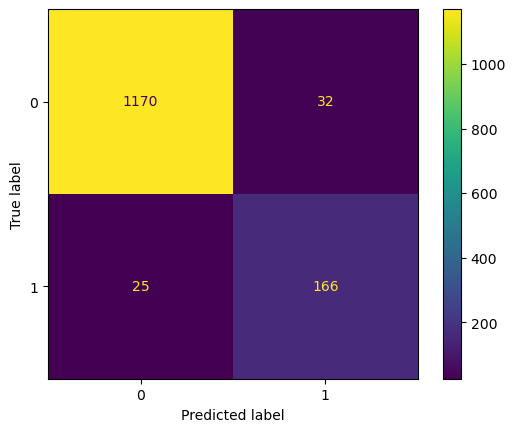

In [ ]:
#Ploting the confusion matrix
cm= confusion_matrix(y_test, classifier1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_classifier_1.classes_)
disp.plot()

#classification report
print(classification_report(y_test, classifier1_pred))


<module 'matplotlib.pyplot' from '/Users/anuraggupta/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

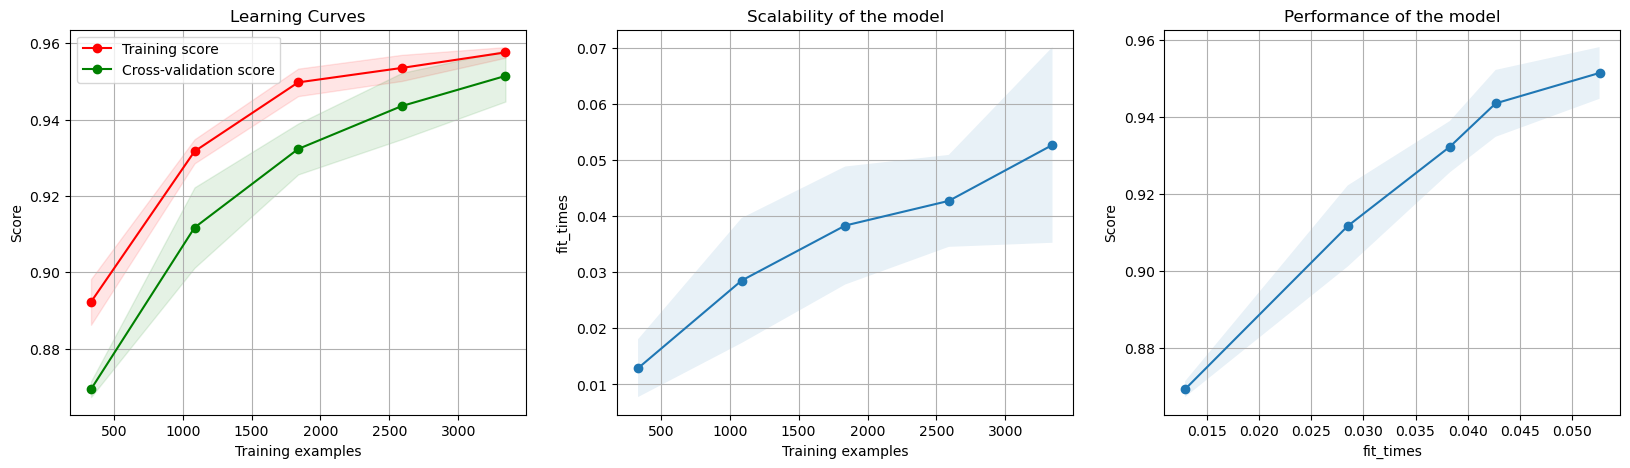

In [ ]:
# plot learning curces
plot_learning_curve(grid_classifier_1.best_estimator_, 'Learning Curves',
                    X_train_cleaned, y_train, n_jobs=-1)

### **Pipeline 2**

---



---

In this case we will extract following features and use these as the input to our logistic regression.\

number of words \
number of characters \
number of characters without space \
average word length \
number of digits \
number of numbers \
number of nouns or propernouns \
number of aux \
number of verbs \
number of adjectives \
number of ner (entiites) \
Spelling mistakes \

#### Feature Engineering for X_train_sample_cleaned, X_train_cleaned, X_test_cleaned

In [ ]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm')
X_train_sample_features, feature_names = featurizer.fit_transform(X_train_sample_cleaned)
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned)
X_test_features, feature_names = featurizer.fit_transform(X_test_cleaned)

#counting Misspelled words
 ##defining function
def num_misspell(message, spell_checker):
    words = message.split()
    num_misspelled = 0
    for word in words:
        if not spell_checker.correction(word) == word:
            num_misspelled += 1
    return num_misspelled

spell = SpellChecker()
num_misspelled1 = [num_misspell(message, spell) for message in X_train_sample_cleaned]
num_misspelled2 = [num_misspell(message, spell) for message in X_train_cleaned]
num_misspelled3 = [num_misspell(message, spell) for message in X_test_cleaned]

# Create a DataFrame with the sentences and misspelled word counts
spell_train_sample_df1 = pd.DataFrame({'message': X_train_sample_cleaned, 'num_mispelled': num_misspelled1})
spell_train_df2 = pd.DataFrame({'message': X_train_cleaned, 'num_mispelled': num_misspelled2})
spell_test_df3 = pd.DataFrame({'message': X_test_cleaned, 'num_mispelled': num_misspelled3})

##adding misspelled count to featuriser array
num_misspelled_array1 = spell_train_sample_df1['num_mispelled'].values.reshape(-1,1)#spellcount array
X_train_sample_features = np.hstack((X_train_sample_features, num_misspelled_array1))
feature_names.append("num_misspelled")

num_misspelled_array2 = spell_train_df2['num_mispelled'].values.reshape(-1,1)#spellcount array
X_train_features = np.hstack((X_train_features, num_misspelled_array2))
feature_names.append("num_misspelled")

num_misspelled_array3 = spell_test_df3['num_mispelled'].values.reshape(-1,1)#spellcount array
X_test_features = np.hstack((X_test_features, num_misspelled_array3))
feature_names.append("num_misspelled")

In [ ]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(solver='newton-cg',max_iter=10000)),
])

In [ ]:
# Setting the range for class weights
weights2 = np.linspace(0.0, 0.99, 200)

# Parameter Grid
param_grid_classifier_2 = {
    #'vectorizer__max_features': [1000, 2000, 5000],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__class_weight': [{0: x, 1: 1.0 - x} for x in weights2],
}

# GridSearch
grid_classifier_2 = GridSearchCV(
    estimator=classifier_2,
    param_grid=param_grid_classifier_2,
    n_jobs=-1,
    scoring='roc_auc').fit(X_train_sample_features, y_train_sample)

In [ ]:
# let's check the train scores
print(grid_classifier_2.score(
    X_train_sample_features, y_train_sample))

# let's check the cross validation score
print(grid_classifier_2.best_score_)


0.9866387337057729
0.9854029072779072


In [ ]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)


Best cross-validation score: 0.99

Best parameters:  {'classifier__C': 0.1, 'classifier__class_weight': {0: 0.63678391959799, 1: 0.36321608040201003}}

Best estimator:  Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.1,
                                    class_weight={0: 0.63678391959799,
                                                  1: 0.36321608040201003},
                                    max_iter=10000, solver='newton-cg'))])


In [ ]:
##Create Pipeline with class weights
classifier_2_new = Pipeline([
    ('classifier', LogisticRegression(C= 0.1,solver='newton-cg',max_iter=10000, class_weight={0: 0.63678391959799,
                                                  1: 0.36321608040201003}))])

In [ ]:
#fitting on the training data
classifier2_fit= classifier_2_new.fit(X_train_features, y_train)
#predicting test set
classifier2_pred= classifier2_fit.predict(X_test_features)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.97      0.87      0.92       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393



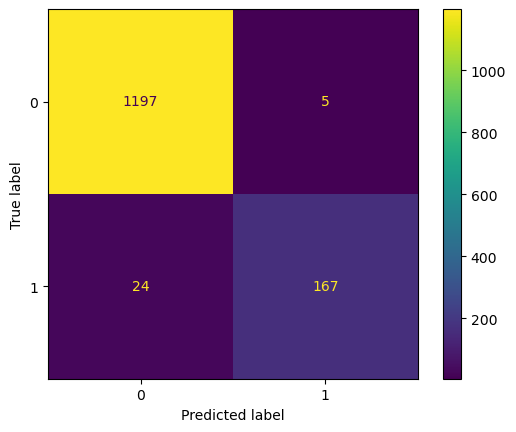

In [ ]:
#Ploting the confusion matrix
cm1= confusion_matrix(y_test, classifier2_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=grid_classifier_2.classes_)
disp.plot()

#classification report
print(classification_report(y_test, classifier2_pred))

<module 'matplotlib.pyplot' from '/Users/anuraggupta/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

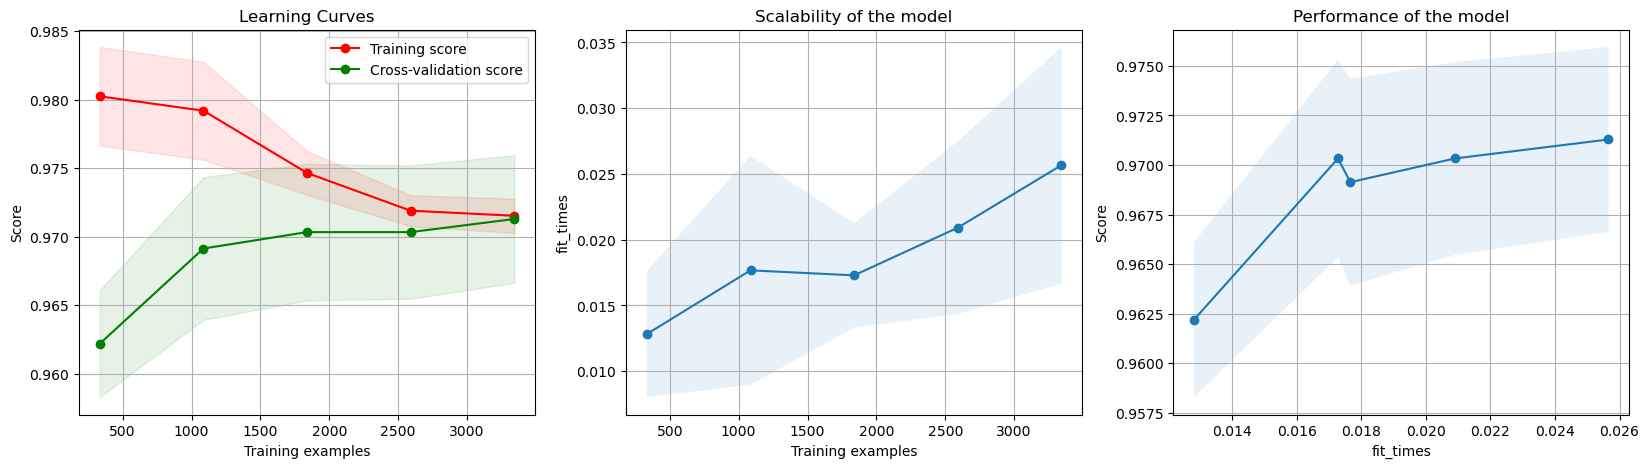

In [ ]:
# plot learning curces
plot_learning_curve(grid_classifier_2.best_estimator_, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)

### **Pipeline 3**

---



---

In [ ]:
feature_names.pop(-2)

In [ ]:
X_train_sample_all = pd.concat((pd.DataFrame(X_train_sample_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_train_sample_features, columns=feature_names)), axis=1)

In [ ]:
X_train_all = pd.concat((pd.DataFrame(X_train_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)

In [ ]:
X_test_all = pd.concat((pd.DataFrame(X_test_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_test_features, columns=feature_names)), axis=1)

In [ ]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [ ]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [ ]:

sparse_features.fit_transform(X_train_sample_all.iloc[:, 1:])
vectorizer.fit_transform(X_train_sample_all.iloc[:, 0])
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)

In [ ]:
test = combined_features.fit_transform(X_train_sample_all)

Final Pipeline

In [ ]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(solver='newton-cg',max_iter=10000)),
                         ])

In [ ]:
classifier_3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

In [ ]:
# Setting the range for class weights
weights3 = np.linspace(0.0, 0.99, 200)

# Parameter Grid
param_grid_classifier_3 = {
    'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__class_weight': [{0: x, 1: 1.0 - x} for x in weights3],
}

# GridSearch
grid_classifier_3 = GridSearchCV(
    estimator=classifier_3,
    param_grid=param_grid_classifier_3,
    n_jobs=-1,
    scoring='roc_auc')

In [ ]:
grid_classifier_3fit= grid_classifier_3.fit(X_train_sample_all, y_train_sample)

In [ ]:
# let's check the train scores
print(grid_classifier_3.score(
    X_train_sample_all, y_train_sample))

# let's check the cross validation score
print(grid_classifier_3.best_score_)

1.0
0.9908111564361566


In [ ]:
print(
    "Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)


Best cross-validation score: 0.99

Best parameters:  {'classifier__C': 100, 'classifier__class_weight': {0: 0.5074371859296483, 1: 0.49256281407035174}, 'combined_features__tfidf__tfidf__max_features': 1000}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=1000))]),
                                                  'cleaned_text')])),
                ('classifier',
                 LogisticRegression(C=100,
                                    class_weight={0: 0.5074371859296483,
                                                  1: 0.49256281407035174},
                                    max_iter=

In [ ]:
#final pipeline
classifier_3new = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(C=100,solver='newton-cg',max_iter=10000, class_weight={0: 0.5074371859296483,
                                                  1: 0.49256281407035174})),
                         ])

In [ ]:
#fitting on the training data
classifier3new_fit= classifier_3new.fit(X_train_all, y_train)
#predicting test set
classifier3_pred= classifier3new_fit.predict(X_test_all)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.97      0.90      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



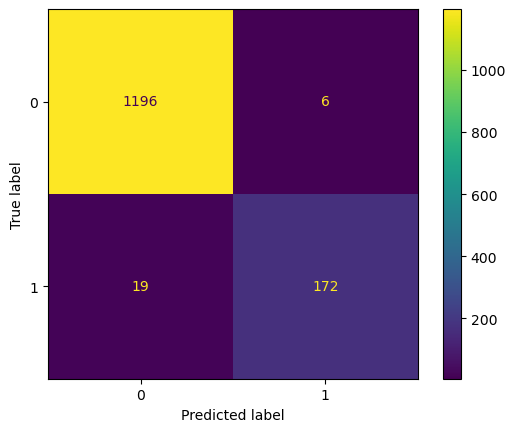

In [ ]:
#Ploting the confusion matrix
cm2= confusion_matrix(y_test, classifier3_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=grid_classifier_3.classes_)
disp.plot()

#classification report
print(classification_report(y_test, classifier3_pred))